<a href="https://colab.research.google.com/github/Jayasree-05/FMD/blob/main/fmd_tensorflow_openCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING** **LIBRARIES**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

**KAGGLE** **CREDENTIALS** 

In [ ]:
import os
os.environ['KAGGLE_USERNAME']='USERNAME'
os.environ['KAGGLE_KEY']='API key'

**DOWNLOADING IMAGES DIRECTLY FROM KAGGLE**

In [ ]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

100% 207M/207M [00:01<00:00, 131MB/s]
100% 207M/207M [00:01<00:00, 138MB/s]


**UNZIPPING**

In [ ]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

**IMAGE VISUALIZATION**

In [ ]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')

In [ ]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['1383.jpg', '0216.jpg', '0561.jpg', '0566.jpg', '0761.jpg', '0657.jpg', '1631.jpg', '0802.jpg', '1264.jpg', '0773.jpg']
['7.jpg', '73.jpg', '160.jpg', '130.jpg', '57.jpg', '233.jpg', '283.jpg', '99.jpg', '39.jpg', '102.jpg']


['/content/New Masks Dataset/Train/Mask/1383.jpg', '/content/New Masks Dataset/Train/Mask/0216.jpg', '/content/New Masks Dataset/Train/Mask/0561.jpg', '/content/New Masks Dataset/Train/Mask/0566.jpg', '/content/New Masks Dataset/Train/Mask/0761.jpg', '/content/New Masks Dataset/Train/Mask/0657.jpg', '/content/New Masks Dataset/Train/Mask/1631.jpg', '/content/New Masks Dataset/Train/Mask/0802.jpg']
['/content/New Masks Dataset/Train/Non Mask/7.jpg', '/content/New Masks Dataset/Train/Non Mask/73.jpg', '/content/New Masks Dataset/Train/Non Mask/160.jpg', '/content/New Masks Dataset/Train/Non Mask/130.jpg', '/content/New Masks Dataset/Train/Non Mask/57.jpg', '/content/New Masks Dataset/Train/Non Mask/233.jpg', '/content/New Masks Dataset/Train/Non Mask/283.jpg', '/content/New Masks Dataset/Train/Non Mask/99.jpg']


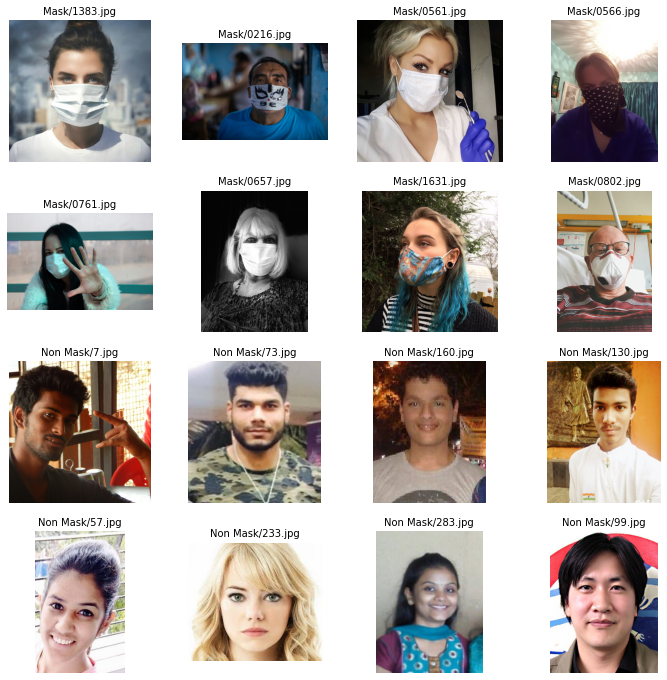

In [ ]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_pics = mask_pic+nomask_pic

for i in range(0,len(merged_pics)):
  data = merged_pics[i].split('/',4)[4]
  sp = plt.subplot(4,4,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_pics[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()

**DATA AUGMENTATION**

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [ ]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
19/19 [==============================] - 19s 647ms/step - loss: 2.7021 - accuracy: 0.5087 - val_loss: 0.6931 - val_accuracy: 0.4804
Epoch 2/30
19/19 [==============================] - 12s 626ms/step - loss: 0.6716 - accuracy: 0.6268 - val_loss: 0.5874 - val_accuracy: 0.8562
Epoch 3/30
19/19 [==============================] - 12s 621ms/step - loss: 0.4783 - accuracy: 0.7833 - val_loss: 0.5328 - val_accuracy: 0.8007
Epoch 4/30
19/19 [==============================] - 12s 622ms/step - loss: 0.3361 - accuracy: 0.8899 - val_loss: 0.3569 - val_accuracy: 0.8954
Epoch 5/30
19/19 [==============================] - 11s 620ms/step - loss: 0.4500 - accuracy: 0.8325 - val_loss: 0.4993 - val_accuracy: 0.8301
Epoch 6/30
19/19 [==============================] - 12s 623ms/step - loss: 0.3096 - accuracy: 0.9022 - val_loss: 0.3388 - val_accuracy: 0.8791
Epoch 7/30
19/19 [==============================] - 12s 627ms/step - loss: 0.2987 - accuracy: 0.8986 - val_loss: 0.2981 - val_accuracy: 0.8824

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

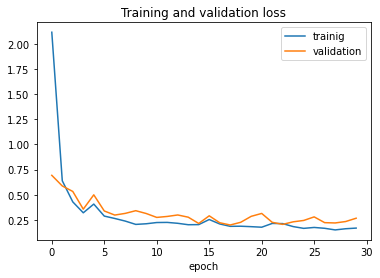

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

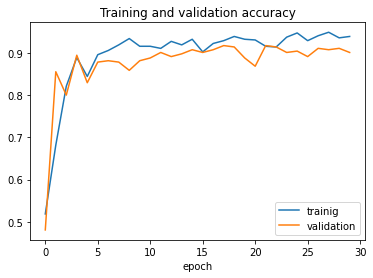

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [ ]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

4/4 [==============================] - 1s 294ms/step - loss: 0.1944 - accuracy: 0.9400
test acc :0.9399999976158142 test loss:0.19439561665058136


**PREDICTING ON STATIC IMAGES**

In [30]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving IMG1.jpg to IMG1 (2).jpg
Saving IMG2.jpg to IMG2 (2).jpg
IMG1.jpg
mask
IMG2.jpg
nomask
